In [ ]:
!pip install gym

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cp_env = gym.make("CartPole-v0")

In [ ]:
GAMMA = 0.8
ALPHA = 0.008
MAXSTATES = 10**4
total_reward = 0

In [ ]:
def find_max(d_dict):
  max_value = float("-inf")
  for key, value in d_dict.items():
    if value > max_value:
      max_value = value
      max_key = key
  return max_key, max_value

def create_observations():
  observations = np.zeros((4, 10))
  observations[0] = np.linspace(-4.8,4.8,10)
  observations[1] = np.linspace(-5,5,10)
  observations[2] = np.linspace(-.418,.418,10)
  observations[3] = np.linspace(-5,5,10)

  return observations

In [ ]:
def set_state(observation, observations):
  state = np.zeros(4)
  for i in range(4):
    state[i] = np.digitize(observation[i], observations[i])
  return state

def get_state(state):
  state_to_string = ''.join(str(int(e)) for e in state)
  return state_to_string

def get_states():
  states = []
  for i in range (MAXSTATES):
    states.append(str(i).zfill(4))
  return states

def create_q():
  Q = {}
  
  all_states = get_states()
  for state in all_states:
    Q[state] = {}
    for action in range(cp_env.action_space.n):
      Q[state][action]= 0
  return Q

In [ ]:
def play_game(observations, Q, eps = 0.5):
  observation = cp_env.reset()
  done = False
  cnt = 0
  state = get_state(set_state(observation, observations))

  while not done:
    cnt+= 1
    if np.random.uniform() <eps:
      act = cp_env.action_space.sample()
    else:
      act = find_max(Q[state])[0]
    
    observation, reward, done, _ = cp_env.step(act)

    global total_reward
    total_reward += reward

    if done and cnt <200:
      reward = -300

    state_new = get_state(set_state(observation, observations))

    al, max_q_slal = find_max(Q[state_new])
    Q[state][act] += ALPHA*(reward+GAMMA*max_q_slal - Q[state][act])
    state, act = state_new, al
    
    cp_env.close()
  return total_reward, cnt

def play_games(observations, N = 10000):
  Q = create_q()

  length = []
  reward = []
  for n in range(N):
    eps = 1.0/np.sqrt(n-1)

    episode_reward, episode_length = play_game(observations, Q, eps)

    if n % 100 == 0:
      print(n, '%.3f' % eps, episode_length)
    length.append(episode_length)
    reward.append(episode_reward)

  return length, reward

In [ ]:
def plot_game_stat(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range (N):
    running_avg[t] = np.mean(totalrewards[max(0, t - 100):(t+1)])
  plt.plot(running_avg)
  plt.title("Training scores plot")
  plt.ylabel("Score")
  plt.xlabel("Runs")
  plt.show()

In [ ]:
observations = create_observations()
episode_length, episode_rewards = play_games(observations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


0 nan 9
100 0.101 41
200 0.071 70
300 0.058 20
400 0.050 128
500 0.045 127
600 0.041 100
700 0.038 125
800 0.035 128
900 0.033 126
1000 0.032 126
1100 0.030 130
1200 0.029 131
1300 0.028 58
1400 0.027 120
1500 0.026 118
1600 0.025 127
1700 0.024 122
1800 0.024 138
1900 0.023 141
2000 0.022 137
2100 0.022 128
2200 0.021 137
2300 0.021 138
2400 0.020 147
2500 0.020 123
2600 0.020 143
2700 0.019 124
2800 0.019 121
2900 0.019 90
3000 0.018 95
3100 0.018 137
3200 0.018 127
3300 0.017 101
3400 0.017 90
3500 0.017 99
3600 0.017 139
3700 0.016 127
3800 0.016 137
3900 0.016 116
4000 0.016 131
4100 0.016 123
4200 0.015 141
4300 0.015 145
4400 0.015 143
4500 0.015 169
4600 0.015 135
4700 0.015 134
4800 0.014 154
4900 0.014 141
5000 0.014 140
5100 0.014 145
5200 0.014 147
5300 0.014 153
5400 0.014 146
5500 0.013 130
5600 0.013 133
5700 0.013 137
5800 0.013 135
5900 0.013 155
6000 0.013 159
6100 0.013 148
6200 0.013 147
6300 0.013 148
6400 0.013 155
6500 0.012 136
6600 0.012 140
6700 0.012 146
6800

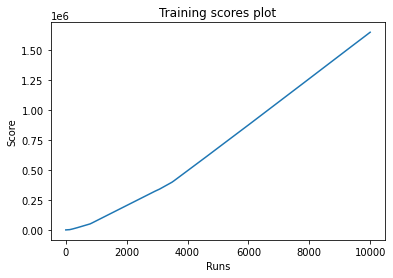

In [ ]:
plot_game_stat(episode_rewards)